<a href="https://colab.research.google.com/github/NataliaGoszcz/PRA1week/blob/main/assignmentweek2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge 1 (set 1): Identify a loud binary black hole signal in white, Gaussian noise

In [2]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.1/298.1 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [154]:
#load in the data
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')

In [4]:
#starting time of sampling data:
gwpy_strain.t0

<Quantity -64. s>

In [155]:
# sampling rate and duration of the data

In [6]:
duration = pycbc_strain.duration
print("Duration of the data is", duration,"s")

Duration of the data is 128.0 s


In [7]:
delt = pycbc_strain.delta_t
samrate = 1/delt
print("Sampling rate is equal to", samrate,"Hz")

Sampling rate is equal to 4096.0 Hz


In [8]:
# plot the data in the time-domain

In [9]:
#put sample time on the x axis
pycbc_strain.sample_times.data
#put data on the y axis
pycbc_strain.data

array([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24, ...,
       -4.43135131e-23, -2.34576855e-22,  4.51019899e-22])

Text(0.5, 1.0, 'Plot in the time domain')

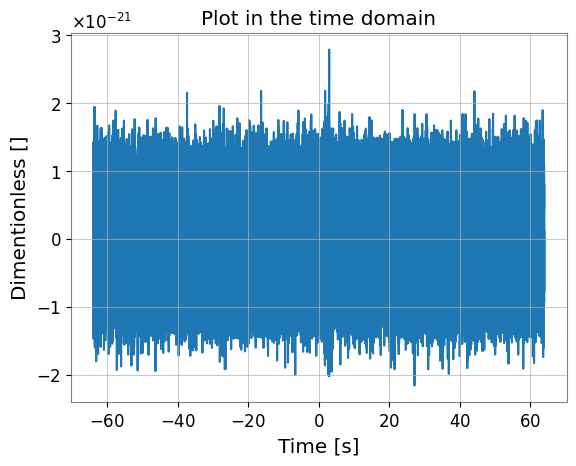

In [10]:
import pylab
plot = pylab.plot(pycbc_strain.sample_times.data, pycbc_strain.data)
pylab.xlabel("Time [s]")
pylab.ylabel("Dimentionless []")
pylab.title("Plot in the time domain")

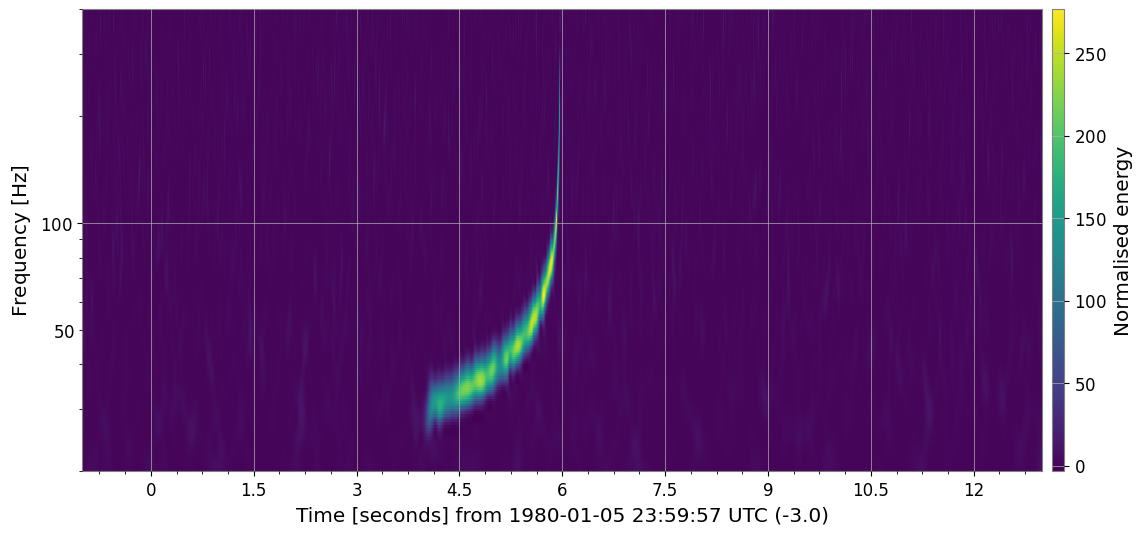

In [159]:
#plot a q-transform and approximate the merger time
q = gwpy_strain.q_transform(frange=(20, 400), qrange=(10, 15), outseg=(-4, 10))
plot = q.plot()
ax = plot.gca()
ax.set_yscale("log")
ax.colorbar(label="Normalised energy")

In [160]:
print("approximate merger time is equal to 5.8-3 = 2.8 s or approx. 3s")

approximate merger time is equal to 5.8-3 = 2.8 s or approx. 3s


# Challenge 2 (set 1): Signal in colored, Gaussian noise

In [14]:
#load in data
from gwpy.timeseries import TimeSeries
gwpy_strain2 = TimeSeries.read("challenge2.gwf", channel="H1:CHALLENGE2")
from pycbc import frame
pycbc_strain2 = frame.read_frame("challenge2.gwf", "H1:CHALLENGE2")

-64.0 s


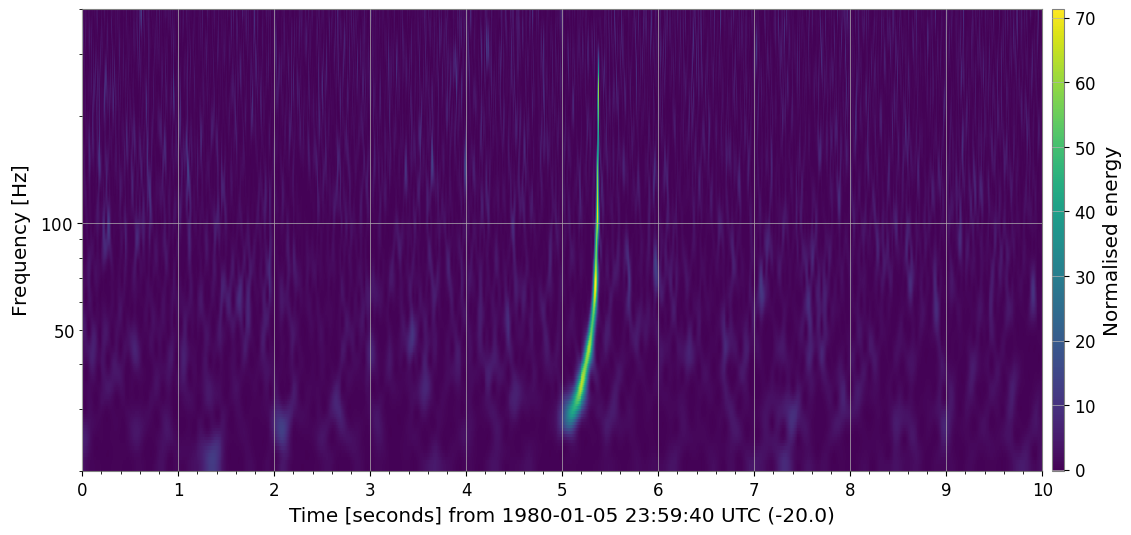

In [15]:
#q-transform to approximate merger time
print(gwpy_strain2.t0) #starting time of sampling data
q = gwpy_strain2.q_transform(frange=(20, 400), qrange=(10, 15), outseg=(-20,-10))
plot = q.plot()
ax = plot.gca()
ax.set_yscale("log")
ax.colorbar(label="Normalised energy")

In [16]:
print("merger time is either 49.4s (5.4+44) or -14.6s (5.4-20 = -14.6s)")

merger time is either 49.4s (5.4+44) or -14.6s (5.4-20 = -14.6s)


In [17]:
# generating and plotting a time-domain template waveform

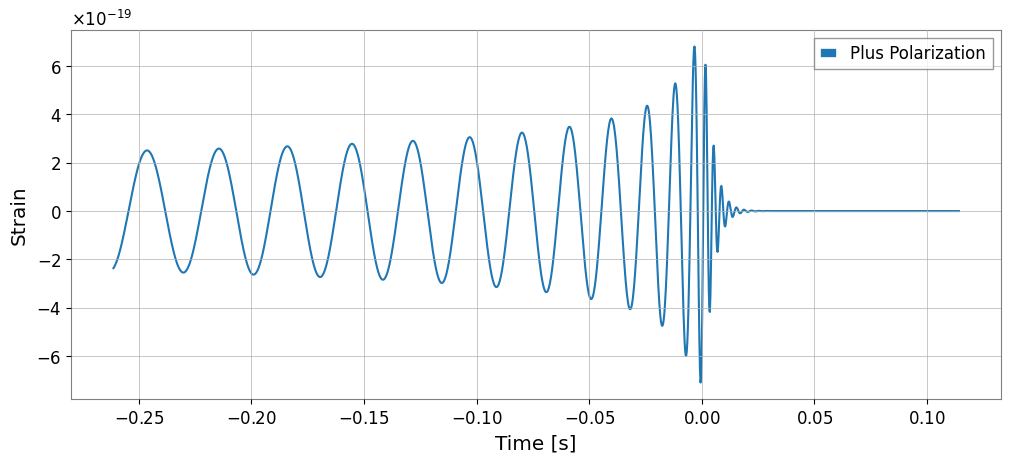

In [167]:
from pycbc.waveform import get_td_waveform
import pylab
m = 30 # mass of 30 solar masses
hp, _ = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m,
                         mass2=m,
                         delta_t= pycbc_strain2.delta_t,
                         f_lower=30)
# I didn't include spin since it's = 0
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label="Plus Polarization")
pylab.xlabel("Time [s]")
pylab.ylabel("Strain")
pylab.legend()

In [161]:
# Calculate a PSD of the data, and plot this on a log-log scale.
# Use axes ranging from 20 Hz up to the Nyquist frequency - half of sampling frequency

In [162]:
#calculating nyquist frequency
delt2 = pycbc_strain2.delta_t
samrate2 = 1/delt
nyqf = samrate2/2
print("Nyquist frequency is equal to", nyqf)

Nyquist frequency is equal to 2048.0


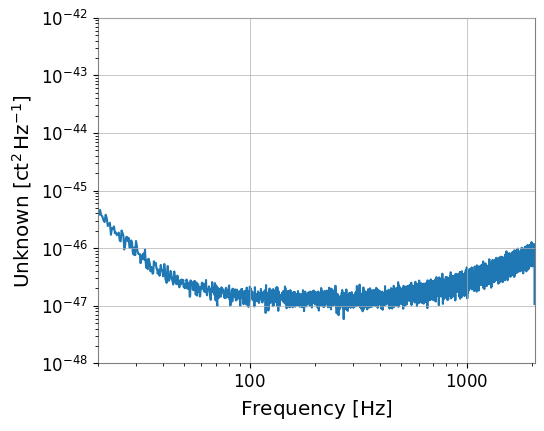

In [164]:
#calculating and plotting the psd
import pycbc.psd
psd = gwpy_strain2.psd(fftlength=4, method="median")
plotpsd = psd.plot()
ax = plotpsd.gca()
ax.set_xlim(20, nyqf)
ax.set_xscale("log")
ax.set_ylim(1e-48, 1e-42)
ax.set_yscale("log")

In [21]:
#Use the template waveform and PSD to calculate the SNR time series.
#Plot the SNR time-series.

In [168]:
#conditioning the data and the psd
from pycbc.psd import interpolate, inverse_spectrum_truncation
conditioned = pycbc_strain2.crop(2, 2)
psdc = conditioned.psd(4)
psdc = interpolate(psdc, conditioned.delta_f)
psdc = inverse_spectrum_truncation(psdc, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

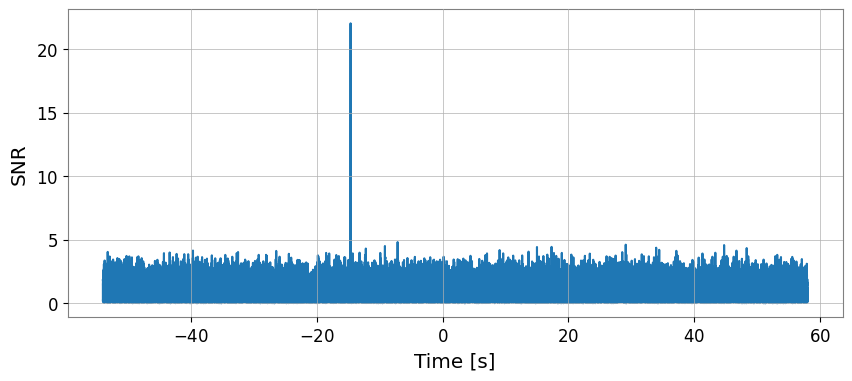

Found a signal at -14.6328125s with SNR equal to 22.02924254727379
This confirms my approximation of the merger time -14.6s earlier :)


In [169]:
# doing the snr and plotting it
from pycbc.filter import matched_filter
import numpy
hp.resize(len(conditioned))
template = hp.cyclic_time_shift(hp.start_time)
snr = matched_filter(template, conditioned,
                 psd=psdc, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4)

pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel("SNR")
pylab.xlabel("Time [s]")
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("Found a signal at {}s with SNR equal to {}".format(time,
                                                    abs(snrp)))
print("This confirms my approximation of the merger time -14.6s earlier :)")

# Challenge 2 (set 2)

Text(0, 0.5, 'strain')

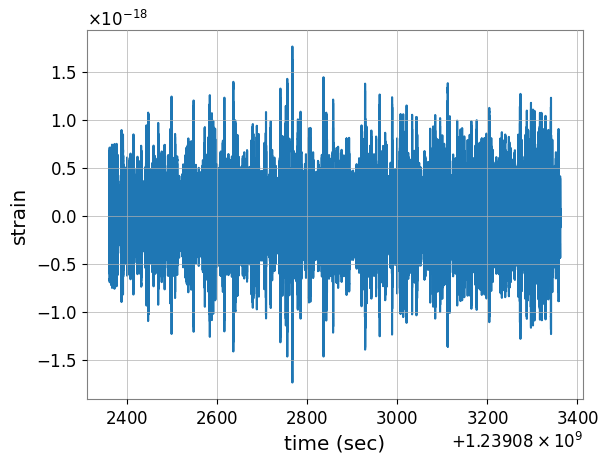

In [172]:
#load in data
import numpy as np
import pycbc
from pycbc.types import FrequencySeries, TimeSeries
import matplotlib.pyplot as plt
d = np.load('noise_ts_4096Hz.npy')
time = d[:, 0]
d = pycbc.types.TimeSeries(d[:, 1], delta_t = time[1]-
time[0])
data = d
plt.plot(time, data)
plt.xlabel('time (sec)')
plt.ylabel('strain')

In [171]:
# checking the nyquist frequency
duration = data.duration
print ("Duration of the data", duration)
samrate = 1/data.delta_t
nyqf = samrate/2
print ("Nyquist frequency", nyqf)


Duration of the data 1000.0
Nyquist frequency 2048.0


0.001


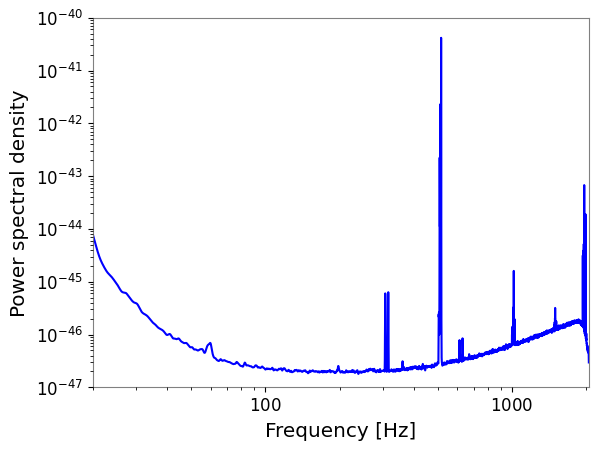

In [115]:
#calculate and plot the psd
from pycbc.psd import welch, interpolate, inverse_spectrum_truncation
import pylab
import pycbc.noise
import pycbc.psd

fd = data.to_frequencyseries()
psd = interpolate(data.psd(2), fd.delta_f)
psd = inverse_spectrum_truncation(psd, int(2*samrate), low_frequency_cutoff=15.0, trunc_method="hann")
print(psd.delta_f)
pylab.loglog(psd.sample_frequencies, psd, label="H1", color='b')
pylab.xlim(20, nyqf)
pylab.ylim(1e-47, 1e-40)
pylab.xlabel("Frequency [Hz]")
pylab.ylabel("Power spectral density")
pylab.grid()
pylab.show()

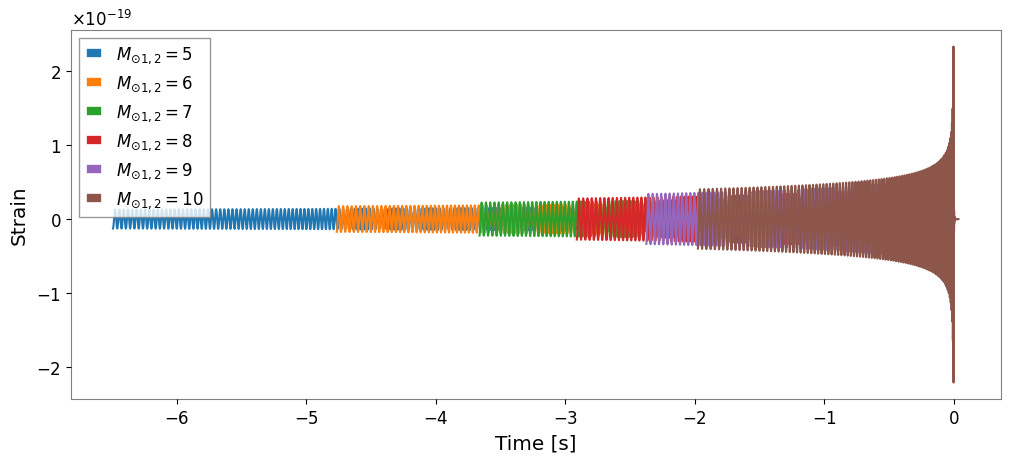

In [29]:
#make the waveforms for different masses
from pycbc.waveform import get_td_waveform
import pylab
pylab.figure(figsize=pylab.figaspect(0.4))
for m in [5, 6, 7, 8, 9, 10]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m,
                         mass2=m,
                         delta_t=1.0/4096,
                         f_lower=30)

    pylab.plot(hp.sample_times, hp, label="$M_{\odot 1,2}=%s$" % m)
pylab.legend()
pylab.grid()
pylab.xlabel("Time [s]")
pylab.ylabel("Strain")
pylab.show()

In [30]:
#conditioning the data and the psd
from pycbc.psd import interpolate, inverse_spectrum_truncation
conditioned = data.crop(2, 2)
dur = conditioned.duration
print("Duration of the conditioned data:",dur)
psdc = conditioned.psd(4)
psdc = interpolate(psdc, conditioned.delta_f)
psdc = inverse_spectrum_truncation(psdc, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

Duration of the conditioned data: 996.0


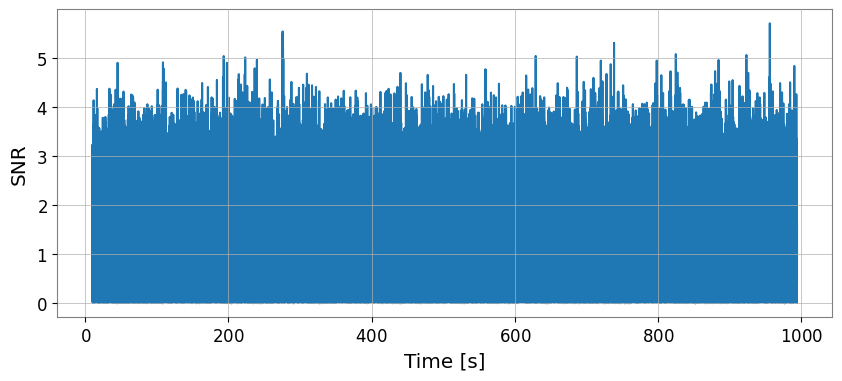

The most powerful signal at 956.0270996090002s with SNR equal to 5.7138425334810705
Since the SNr is smaller than 8 we can't say there's a detection of GW.


In [31]:
#make the SNR and search for the GW signal
from pycbc.filter import matched_filter
import numpy
hp.resize(len(conditioned))
template = hp.cyclic_time_shift(hp.start_time)
snr = matched_filter(template, conditioned,
                 psd=psdc, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4)

pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel("SNR")
pylab.xlabel("Time [s]")
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("The most powerful signal at {}s with SNR equal to {}".format(time,
                                                    abs(snrp)))
print("Since the SNr is smaller than 8 we can't say there's a detection of GW.")

In [32]:
#Whiten the above data using its noise PSD. Construct a histogram of the whitened data and
#show that the whiten data follows a Gaussian distribution with zero mean.

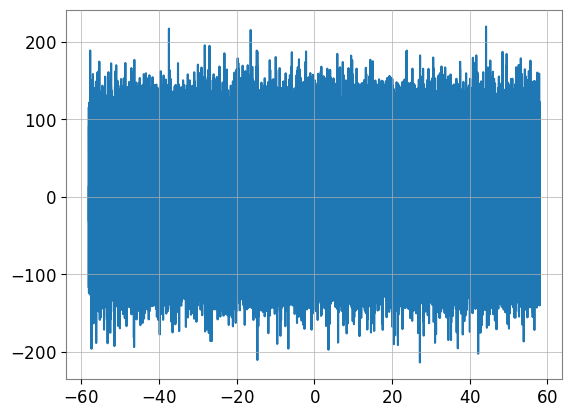

In [173]:
#whitening the conditioned data
from pycbc.types import TimeSeries
psdc[0] = psdc[1]
psdc[len(psdc) - 1] = psdc[len(psdc) - 2]
confd = conditioned.to_frequencyseries()
data_whitened = (confd / psdc**0.5).to_timeseries()
data_whitened = data_whitened.crop(4,4)
plot = data_whitened.plot()

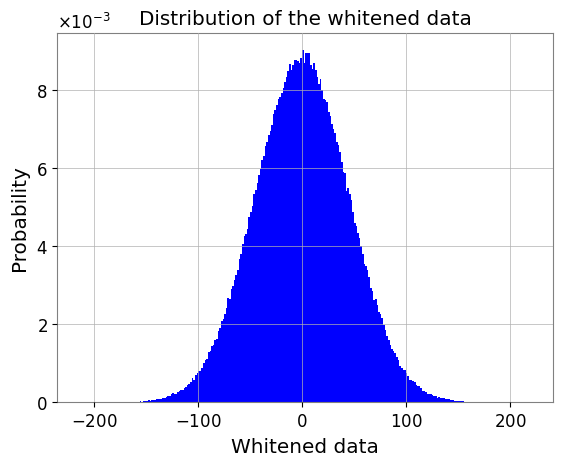

Histogram and Gaussian Fit (Mean={mean:.2f}, Standard Deviation={std_dev:.2f})
This histogram resembles the Gaussian distribution with zero mean


In [174]:
# Plotting a histogram
plt.hist(data_whitened, bins="auto", density = True, color="b")
# Adding labels and title
plt.title("Distribution of the whitened data")
plt.xlabel("Whitened data")
plt.ylabel("Probability")
# Display the plot
plt.show()
mean = np.mean(data_whitened)
std_dev = np.std(data_whitened)

print("Histogram and Gaussian Fit (Mean={mean:.2f}, Standard Deviation={std_dev:.2f})")
print("This histogram resembles the Gaussian distribution with zero mean")

In [149]:
#Test to show that the stationarity does not hold for the noise

In [175]:
#make an arbitrary waveform in frequency domain
from pycbc.waveform import get_fd_waveform
hp, hc = get_fd_waveform(approximant="TaylorF2",
mass1=2,
mass2=2,
delta_f= 0.1, #chosen because waveform frequency and psd frequency need to match and I'm using 10s chunks
distance = 500,
f_lower=20.0, f_final = 2048.0)


In [150]:
#decide to make 10s chunks of data
chunk_duration = 10
n_chunks =  int(np.ceil(data.duration / chunk_duration))
print ("Number of chunks:",n_chunks,"for",data.duration,"seconds of data")

Number of chunks: 100 for 1000.0 seconds of data


In [151]:
# calculate the optimal SNR of an arbitrary gravitational wafeform and chunks of data
from pycbc.filter import sigmasq
SNR = [] # make SNR a list to make a histogram later
for i in range(n_chunks):
    # Extract the chunk of data
    t_start = i * chunk_duration
    t_end = (i + 1) * chunk_duration
    chunk = data.time_slice(t_start, t_end)
    #calculate the psd
    psd = chunk.psd(10)
    # Calculate the optimal SNR and add it to the list
    snr = (pycbc.filter.sigmasq(hp, psd))**0.5
    SNR.append(snr)

Text(0, 0.5, 'Histogram')

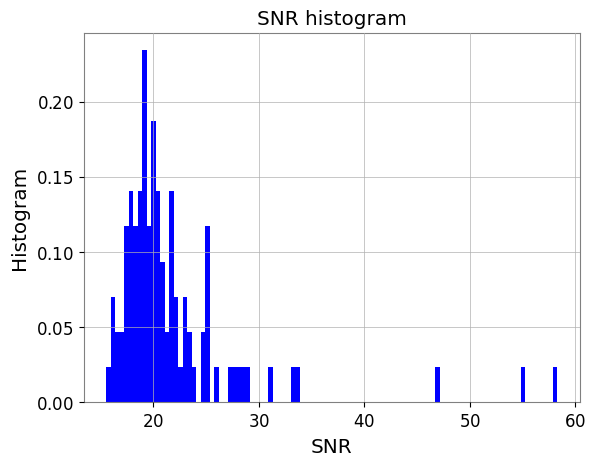

In [179]:
# Plotting a histogram
plt.hist(SNR, bins=100, density = True, color="b")
# Adding labels and title
plt.title("SNR histogram")
plt.xlabel("SNR")
plt.ylabel("Histogram")

In [178]:
print("SNR depends on the waveform, which is the same for all of the chunks and on the psd")
print("The psd for the chunks must be different if it produces various snrs - noise is not stationary")

SNR depends on the waveform, which is the same for all of the chunks and on the psd
The psd for the chunks must be different if it produces various snrs - noise is not stationary
